In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import seaborn as sns
import numpy as np
import nltk
nltk.download('wordnet')
import re

[nltk_data] Downloading package wordnet to /Users/a0j01no/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Reading the data

In [2]:
tweets = pd.read_csv("Tweets-1.csv")

In [3]:
tweets[["text", "airline_sentiment"]].values[14]

array(['@VirginAmerica Thanks!', 'positive'], dtype=object)

In [4]:
tweets.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

### Number of Airlines

In [5]:
pd.unique(tweets.loc[:, "airline"])

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

In [6]:
tweets[tweets["airline"] == "United"]["airline_sentiment"].value_counts().index

Index(['negative', 'neutral', 'positive'], dtype='object')

<BarContainer object of 3 artists>

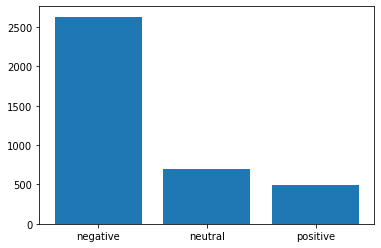

In [7]:
plt.bar(["negative","neutral","positive"],
        tweets[tweets["airline"] == "United"]["airline_sentiment"].value_counts().values)

### Plotting sentiment records for all airlines

Text(0.5, 1.0, 'American')

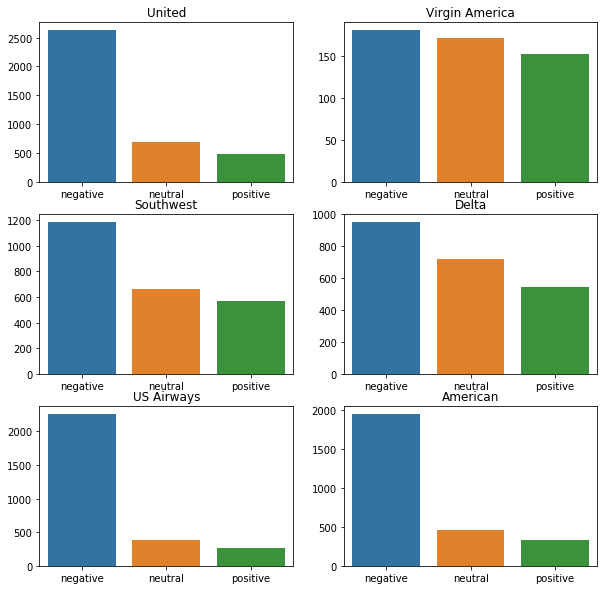

In [8]:
plt.figure(figsize=[10,10])
plt.subplot(3,2,1)
sns.barplot(["negative","neutral","positive"],
        tweets[tweets["airline"] == "United"]["airline_sentiment"].value_counts().values).set_title("United")
plt.subplot(3,2,2)
sns.barplot(["negative","neutral","positive"],
        tweets[tweets["airline"] == "Virgin America"]["airline_sentiment"].value_counts().values).set_title("Virgin America")
plt.subplot(3,2,3)
sns.barplot(["negative","neutral","positive"],
        tweets[tweets["airline"] == "Southwest"]["airline_sentiment"].value_counts().values).set_title("Southwest")
plt.subplot(3,2,4)
sns.barplot(["negative","neutral","positive"],
        tweets[tweets["airline"] == "Delta"]["airline_sentiment"].value_counts().values).set_title("Delta")
plt.subplot(3,2,5)
sns.barplot(["negative","neutral","positive"],
        tweets[tweets["airline"] == "US Airways"]["airline_sentiment"].value_counts().values).set_title("US Airways")
plt.subplot(3,2,6)
sns.barplot(["negative","neutral","positive"],
        tweets[tweets["airline"] == "American"]["airline_sentiment"].value_counts().values).set_title("American")

In [9]:
pd.pivot_table(tweets, values="airline", index= ["airline_sentiment"], aggfunc=len)

,airline
airline_sentiment,
negative,9178
neutral,3099
positive,2363


In [10]:
pd.pivot_table(tweets[["airline", "airline_sentiment", ]],
               index=["airline"], columns= ["airline_sentiment"], aggfunc=len)

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


In [11]:
tweets["negativereason"][pd.notna(tweets["negativereason"])].value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

In [12]:
tweets["tweet_location"][pd.notna(tweets["negativereason"])].value_counts()

Washington, DC    111
Boston, MA        103
New York, NY       93
New York           86
NYC                68
                 ... 
Novi, MI            1
nyc                 1
oh so magical.      1
Boston,MA           1
college             1
Name: tweet_location, Length: 1987, dtype: int64

In [13]:
tweet_nr=tweets[pd.notna(tweets["negativereason"])]

In [14]:
tweet_loc_nr = tweet_nr[pd.notna(tweet_nr["tweet_location"])]

### Reasons for negative sentiments

In [15]:
pd.unique(tweet_loc_nr.negativereason)

array(['Late Flight', 'Bad Flight', 'Customer Service Issue',
       'Flight Booking Problems', 'Lost Luggage',
       'Flight Attendant Complaints', "Can't Tell", 'Cancelled Flight',
       'Damaged Luggage', 'longlines'], dtype=object)

In [2]:
#tweet_loc_nr[tweet_loc_nr["negativereason"] == "Late Flight"]

In [17]:
pd.pivot_table(tweet_loc_nr[["negativereason", "tweet_location"]], 
               index=["negativereason"], columns=["tweet_location"], aggfunc=len)

tweet_location,DC | Jersey City,Los Angeles,"Mexico, D.F.","NASHVILLE,TN",NYC,Ole Miss • ATL,#BrownsNation,#ManorvilleInExile,#PureMichigan,#Titletown,...,•New York•,⋆city of lost angels⋆,☀️SoFla☀️,☁️,✅,✈,✈️FL/NJ/NYC,✨,❤,"명동서식 37.56638,126.984994"
negativereason,,,,,,,,,,,,,,,,,,,,,
Bad Flight,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Can't Tell,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN
Cancelled Flight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
Customer Service Issue,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Damaged Luggage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Flight Attendant Complaints,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Flight Booking Problems,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Late Flight,NaN,NaN,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,NaN
Lost Luggage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN


## The data seems to be sparse so we cannot drill down any further, so let's use ML techniques to learn more

In [18]:
X = list(tweets.text.values)
Y = list(tweets.airline_sentiment.values)

In [19]:
#Checking if all are marked sentiments
len(X) == len(Y)

True

In [20]:
def preprocess(document, stem=False):
    document = document.lower()
    
    words = word_tokenize(document)
    
    words = [word for word in words if word not in stopwords.words("english")]    # removing stopwords
    
    if stem:
        words = [PorterStemmer().stem(word) for word in words]                     # Stemming the word
    else:
        words = [WordNetLemmatizer().lemmatize(word, pos='v') for word in words]   # Lemmetizing the word 
    
    document = " ".join(words)
    
    return document

In [21]:
all_words = []
message_set = []
for s,l in zip(X,Y):
    #print(s)
    temp = s
    temp = re.sub(r'@[A-Za-z]+', '', temp)                                # removing words with @ signs
    temp = re.sub(r'[^\x00-\x7F]+', '', re.sub(r"http\S+", "", temp))     # removing emoji's
    temp = re.sub(r'[^\w\s]', '', temp)                                   # removing punctuations
    temp = re.sub(r'[0-9]+', '', temp)                                    # removing numbers
    filterd_words = [word for word in preprocess(temp).split() if len(word) > 3]
    if len(filterd_words) == 0:                             # removing the messages which have no words in it
        continue
    message_set.append((filterd_words, l))
    all_words.extend(filterd_words)

In [22]:
def get_word_features(all_words):
    wordlist = nltk.FreqDist(all_words)
    word_features = wordlist.keys()
    return word_features

In [23]:
len(get_word_features(all_words))

9664

In [24]:
idx_80 = int(len(message_set)*0.8)

In [25]:
idx_80

11628

### Taking 80% data for training and 20% for testing

In [283]:
training_messages = message_set[:idx_80]
test_messages = message_set[idx_80:]

In [281]:
word_features = get_word_features(all_words)

### Making the data usable for nltk Naive Bayes classifier

In [282]:
def extract_features(document):
    doc_words = set(document)
    features = {}
    for wf in word_features:
        features['contains(%s)' % wf] = (wf in doc_words)
    return features

In [284]:
training_set = nltk.apply_features(extract_features, training_messages)
testing_set = nltk.apply_features(extract_features, test_messages)

### Applying NB

In [286]:
sentiment_classifier = nltk.NaiveBayesClassifier.train(training_set)

In [292]:
nltk.classify.accuracy(sentiment_classifier, training_set))

0.8632610939112487


### Training accuracy is 86%

In [435]:
nb_Classifier = nltk.classify.accuracy(sentiment_classifier, testing_set)

In [291]:
print(sentiment_classifier.show_most_informative_features(100))

Most Informative Features
      contains(passbook) = True           positi : negati =     36.7 : 1.0
      contains(favorite) = True           positi : negati =     34.3 : 1.0
       contains(helpful) = True           positi : neutra =     27.9 : 1.0
         contains(daily) = True           neutra : negati =     26.7 : 1.0
     contains(beautiful) = True           positi : negati =     24.8 : 1.0
          contains(rock) = True           positi : negati =     23.6 : 1.0
         contains(hours) = True           negati : positi =     23.3 : 1.0
      contains(discount) = True           neutra : negati =     23.0 : 1.0
         contains(kudos) = True           positi : negati =     22.8 : 1.0
       contains(awesome) = True           positi : negati =     22.2 : 1.0
          contains(fail) = True           negati : positi =     21.3 : 1.0
       contains(dragons) = True           neutra : negati =     21.1 : 1.0
     contains(fantastic) = True           positi : negati =     20.6 : 1.0

### Let's try other ML algorithms

In [293]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer='word')

In [329]:
messages_train = []
label_train = []
messages_test = []
label_test = []
for (i,j) in training_messages:
    messages_train.append(" ".join(i))
    label_train.append(j)
for (x,y) in test_messages:
    messages_test.append(" ".join(x))
    label_test.append(y)

In [3]:
#messages_train

In [331]:
messages_train = v.fit_transform(messages_train)
messages_test = v.transform( messages_test)

label_test_num = []
for i in label_test:
    if i == 'negative':
        label_test_num.append(0)
    if i == 'neutral':
        label_test_num.append(-1)
    if i == 'positive':
        label_test_num.append(1)

label_train_num = []
for i in label_train:
    if i == 'negative':
        label_train_num.append(0)
    if i == 'neutral':
        label_train_num.append(-1)
    if i == 'positive':
        label_train_num.append(1)

### Applying Random Forest

In [428]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=250)

In [429]:
rf.fit(messages_train, label_train_num)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [430]:
pred = rf.predict(messages_test)

In [431]:
pred_train = rf.predict(messages_train)

In [537]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.metrics import precision_score, f1_score, roc_auc_score, roc_curve

In [436]:
rf_classifier = accuracy_score(pred, label_test_num)

In [434]:
accuracy_score(pred_train, label_train_num)

0.9926900584795322

### Applying K Nearest Neighbours

In [395]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [359]:
knc = KNeighborsClassifier(3)

In [360]:
knc.fit(messages_train, label_train_num)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [361]:
pred_knc = knc.predict(messages_test)

In [362]:
pred_knc_train = knc.predict(messages_train)

In [437]:
knn_classifier = accuracy_score(pred_knc, label_test_num)

In [364]:
accuracy_score(pred_knc_train, label_train_num)

0.7102683178534571

### Applying SVM

In [391]:
svc = SVC(kernel='poly', C=0.5, probability=True, gamma='auto')
svc.fit(messages_train, label_train_num)

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [392]:
pred_svc = svc.predict(messages_test)
pred_svc_train = svc.predict(messages_train)

In [438]:
svc_classifier = accuracy_score(pred_svc, label_test_num)

In [394]:
accuracy_score(pred_svc_train, label_train_num)

0.6081871345029239

### Applying Decision Tree

In [396]:
dc = DecisionTreeClassifier()

In [397]:
dc.fit(messages_train, label_train_num)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [398]:
pred_dc = dc.predict(messages_test)
pred_dc_train = dc.predict(messages_train)

In [439]:
dt_classifier = accuracy_score(pred_dc, label_test_num)

In [400]:
accuracy_score(pred_dc_train, label_train_num)

0.9926900584795322

### Applying Adaboost Classifier

In [401]:
from sklearn.ensemble import AdaBoostClassifier

In [402]:
ada = AdaBoostClassifier()

In [403]:
ada.fit(messages_train, label_train_num)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [404]:
pred_ada = ada.predict(messages_test)
pred_ada_train = ada.predict(messages_train)

In [440]:
adab_classifier = accuracy_score(pred_ada, label_test_num)

In [406]:
accuracy_score(pred_ada_train, label_train_num)

0.6931544547643619

### Let's plot Accuracies for all the models

In [462]:
classifiers = [nb_Classifier, rf_classifier, knn_classifier, svc_classifier, dt_classifier, adab_classifier]

In [463]:
classifiers
cls = ["naiveb", "randomforest", "knn", "svc", "DecisnTree", "AdaBoost"]

[Text(0.5, 0, 'Alogrithms')]

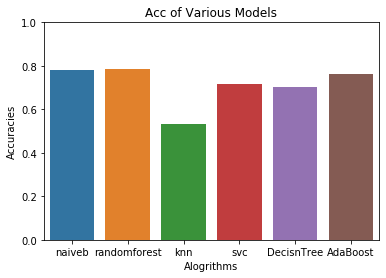

In [471]:
p = sns.barplot(cls,  classifiers)
p.set_title("Acc of Various Models")
p.set(ylim=(0, 1))
p.set(ylabel="Accuracies")
p.set(xlabel="Alogrithms")

## Let's now mark all sentiments apart from negative as 1 and do the training again    

In [473]:
v = CountVectorizer(analyzer='word')

messages_train = []
label_train = []
messages_test = []
label_test = []
for (i,j) in training_messages:
    messages_train.append(" ".join(i))
    label_train.append(j)
for (x,y) in test_messages:
    messages_test.append(" ".join(x))
    label_test.append(y)

In [474]:
messages_train = v.fit_transform(messages_train)
messages_test = v.transform( messages_test)

label_test_num = []
for i in label_test:
    if i == 'negative':
        label_test_num.append(0)
    else:
        label_test_num.append(1)

label_train_num = []
for i in label_train:
    if i == 'negative':
        label_train_num.append(0)
    else:
        label_train_num.append(1)

### Let's try apply Random Forest with various Estimators size

In [ ]:
estimators = [50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
rf_accurarices = []
rf_recall = []
rf_precision = []
rf_f1 = []
rf_roc_auc_score = []
for est in estimators:
    rf = RandomForestClassifier(n_estimators=est, max_depth=)
    rf.fit(messages_train, label_train_num)
    pred = rf.predict(messages_test)
    rf_accurarices.append(accuracy_score(pred, label_test_num))
    rf_recall.append(recall_score(pred, label_test_num))
    rf_precision.append(precision_score(pred, label_test_num))
    rf_f1.append(f1_score(pred, label_test_num))
    rf_roc_auc_score.append(roc_auc_score(pred, label_test_num))

[(0.65, 0.85)]

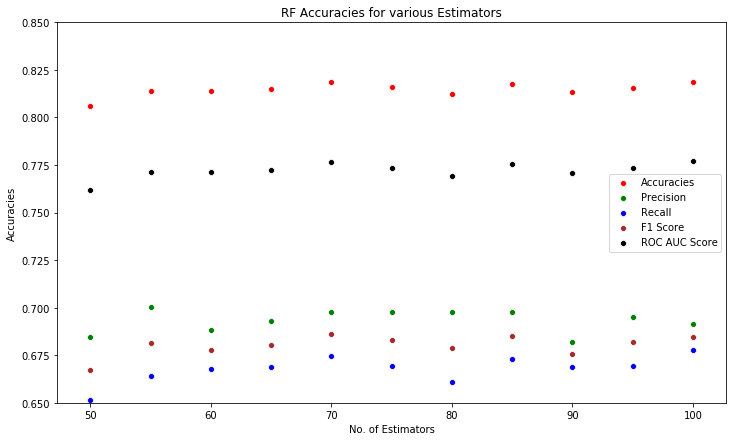

In [551]:
plt.figure(figsize=(12,7))
p = sns.scatterplot(estimators, rf_accurarices, color='red', label="Accuracies")
p = sns.scatterplot(estimators,rf_precision, color='green', label="Precision")
p = sns.scatterplot(estimators,rf_recall, color='blue', label="Recall")
p = sns.scatterplot(estimators,rf_f1, color='brown', label="F1 Score")
p = sns.scatterplot(estimators,rf_roc_auc_score, color='black', label="ROC AUC Score")
p.set_title("RF Accuracies for various Estimators")
p.set(ylabel="Accuracies")
p.set(xlabel="No. of Estimators")
p.set(ylim=(0.65, 0.85))

## From above we can see we get good accuracy, precision and recall at estimator 100

In [506]:
confusion_matrix(pred, label_test_num)

array([[1789,  254],
       [ 291,  573]])

In [552]:
roc_auc_score(pred, label_test_num)

0.7770593600172757

## Also the AUC is 0.78 at estimator 100

### Now let's experiment with Random Forest a more with various depths and estimators

In [561]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}
parameters = {"max_depth": range(5, 25, 5), "n_estimators" : range(50, 101, 5)}
n_folds = 5
rf = RandomForestClassifier()
rf = GridSearchCV(estimator=rf, param_grid=parameters, cv=n_folds, scoring="accuracy", refit='AUC')
rf.fit(messages_train, label_train_num)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(5, 25, 5), 'n_estimators': range(50, 101, 5)},
       pre_dispatch='2*n_jobs', refit='AUC', return_train_score='warn',
       scoring='accuracy', verbose=0)

In [577]:
scores = rf.cv_results_
pd.DataFrame(rf.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.297715,0.022366,0.010498,0.000829,5,50,"{'max_depth': 5, 'n_estimators': 50}",0.608079,0.60834,0.596989,...,0.605951,0.004481,44,0.608214,0.608149,0.620015,0.608191,0.608513,0.610616,0.004701
1,0.546448,0.157162,0.021430,0.004979,5,55,"{'max_depth': 5, 'n_estimators': 55}",0.608509,0.60834,0.608172,...,0.608273,0.000135,33,0.608214,0.608149,0.608191,0.608191,0.608191,0.608187,0.000021
2,0.683755,0.007656,0.024099,0.000311,5,60,"{'max_depth': 5, 'n_estimators': 60}",0.608079,0.60877,0.608172,...,0.608273,0.000251,33,0.608537,0.608149,0.608191,0.608191,0.608621,0.608338,0.000199
3,0.746982,0.010506,0.026380,0.000790,5,65,"{'max_depth': 5, 'n_estimators': 65}",0.608079,0.60834,0.608172,...,0.608187,0.000085,37,0.608214,0.608149,0.608191,0.608191,0.608191,0.608187,0.000021
4,0.794421,0.007573,0.027796,0.000251,5,70,"{'max_depth': 5, 'n_estimators': 70}",0.608079,0.60834,0.608172,...,0.608273,0.000185,33,0.608214,0.608149,0.608406,0.608191,0.608298,0.608252,0.000091


In [581]:
scores.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

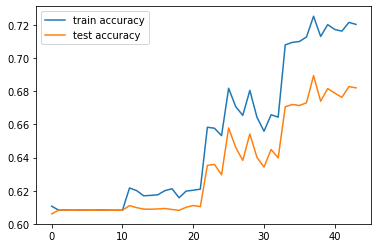

In [582]:
plt.plot(scores["mean_train_score"], label="train accuracy")
plt.plot(scores["mean_test_score"], label="test accuracy")
plt.legend()